<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-19 03:26:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  41.7MB/s    in 0.8s    

2024-06-19 03:26:02 (41.7 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
#QUERY = """
#SELECT Age,COUNT(*) as count
#FROM master
#group by age
#order by age
#"""
#pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [7]:
#table_name = 'master'  # the table you wish to describe

#QUERY = """
#SELECT sql FROM sqlite_master
#WHERE name= '{}'
#""".format(table_name)

#df = pd.read_sql_query(QUERY,conn)
#print(df.iat[0,0])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


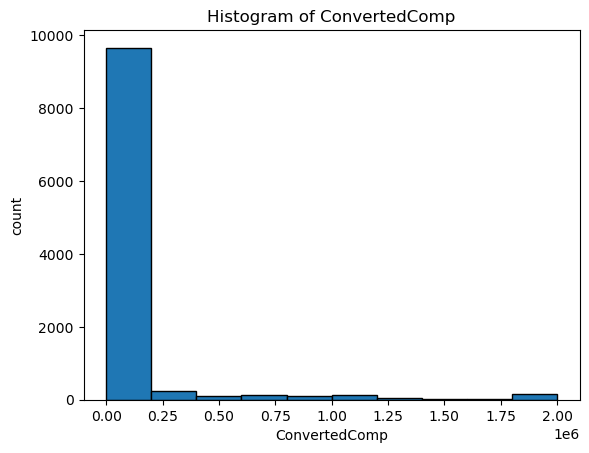

In [9]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
#df['ConvertedComp'].plot(kind='hist')
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#df.head()
df['ConvertedComp'].plot(kind='hist', edgecolor='black')
plt.xlabel("ConvertedComp")
plt.ylabel("count")
plt.title("Histogram of ConvertedComp")
plt.show()

### Box Plots


Plot a box plot of `Age.`


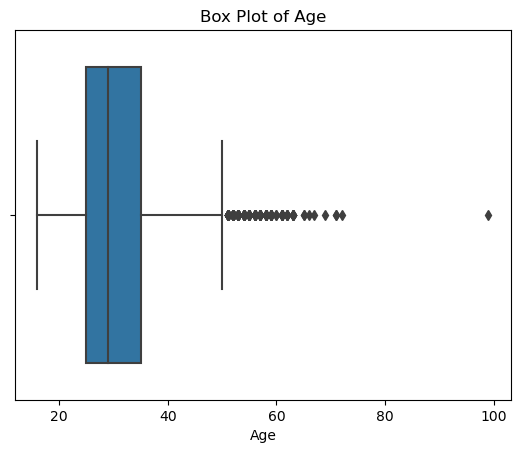

In [10]:
QUERY = """
SELECT Age
FROM master
"""
#df['ConvertedComp'].plot(kind='hist')
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#df.head()
#df['Age'].plot(kind='box')
sns.boxplot(data=df, x= 'Age')
plt.title("Box Plot of Age")
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


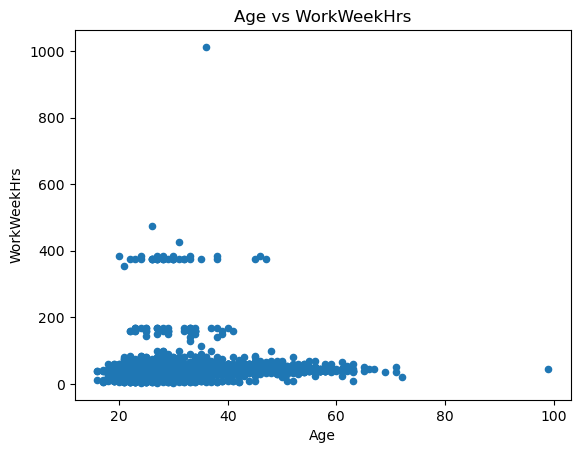

In [11]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
#df['ConvertedComp'].plot(kind='hist')
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#df.head()
#df['Age'].plot(kind='box')
df.plot(kind='scatter', x='Age', y='WorkWeekHrs')
plt.title("Age vs WorkWeekHrs")
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


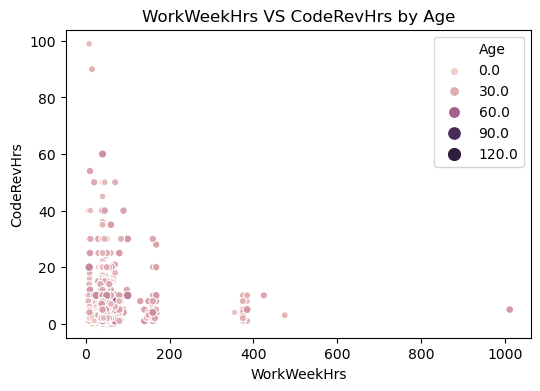

In [12]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WorkWeekHrs', y= 'CodeRevHrs', size='Age', hue='Age')
plt.title("WorkWeekHrs VS CodeRevHrs by Age")
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


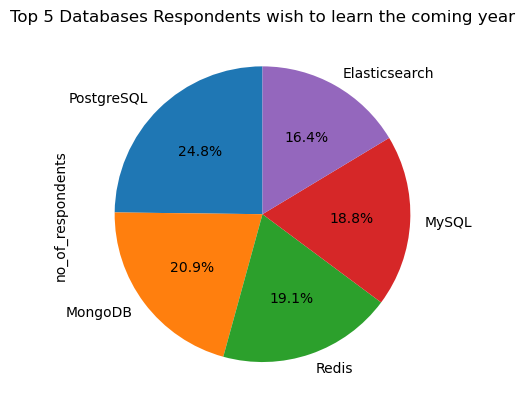

In [13]:
# your code goes here

QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as no_of_respondents
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by COUNT(*) desc
limit 5
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#print(df)
df['no_of_respondents'].plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=df['DatabaseDesireNextYear'])
plt.title("Top 5 Databases Respondents wish to learn the coming year")
#plt.legend(df['DatabaseDesireNextYear'], loc='lower left')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


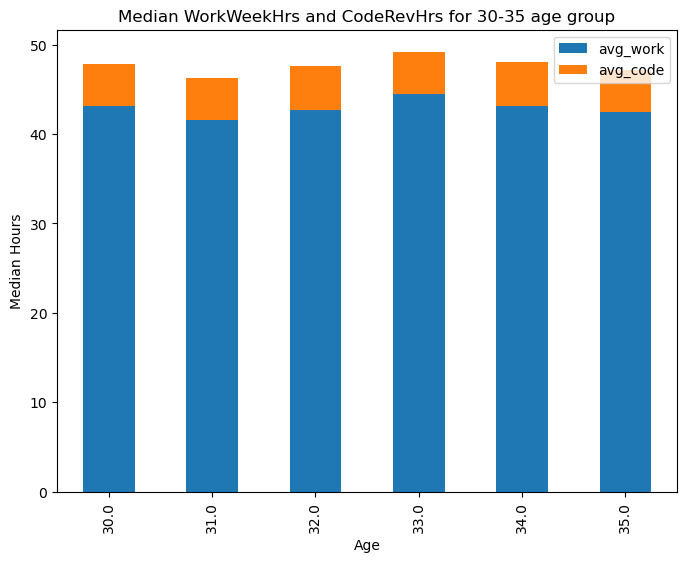

In [38]:
# your code goes here

QUERY = """
SELECT Age, Avg(WorkWeekHrs) as avg_work, Avg(CodeRevHrs) as avg_code
FROM master
WHERE Age BETWEEN 30 AND 35
group by Age
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#print(df)

df.set_index('Age').plot(kind='bar', stacked=True, figsize=(8, 6)) 
plt.title('Median WorkWeekHrs and CodeRevHrs for 30-35 age group')
plt.ylabel('Median Hours')
plt.xlabel('Age')
#plt.legend()
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


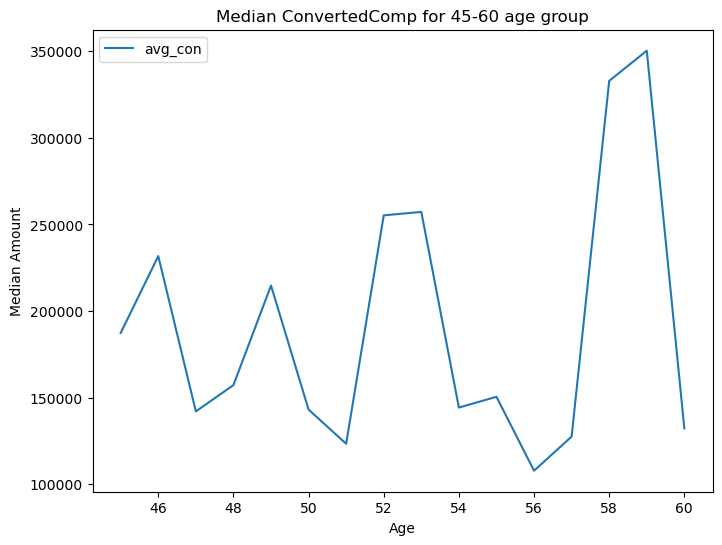

In [41]:
# your code goes here

QUERY = """
SELECT Age, Avg(ConvertedComp) as avg_con
FROM master
WHERE Age BETWEEN 45 AND 60
group by Age
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#print(df)

df.set_index('Age').plot(kind='line', stacked=True, figsize=(8, 6)) 
plt.title('Median ConvertedComp for 45-60 age group')
plt.ylabel('Median Amount')
plt.xlabel('Age')
#plt.legend()
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


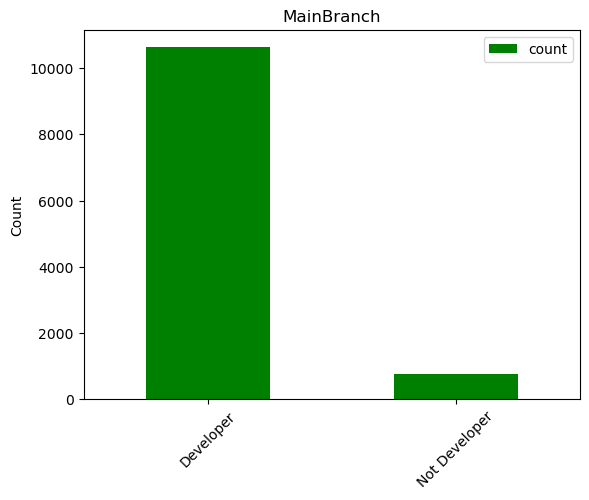

In [16]:
# your code goes here

QUERY = """
SELECT MainBranch,  COUNT(*) as count
FROM master
group by MainBranch
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
#print(df)
df.plot(kind='bar', color = 'g') 
plt.title('MainBranch')
plt.ylabel('Count')
plt.xticks(ticks = [0,1], labels =['Developer', 'Not Developer'], rotation=45)
#plt.xlabel('Respondents')
plt.show()


In [38]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(LanguageDesireNextYear) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by COUNT(LanguageDesireNextYear) desc
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
print(df)

   LanguageDesireNextYear  count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836
20                     F#    621
21                 Elixir    620
22                   Dart    610
23                Clojure    413
24               Assembly    336
25            Objective-C    310
26                 Erlang    310
27                    VBA    149


In [72]:
QUERY = """
SELECT LanguageWorkedWith, count(LanguageWorkedWith)
FROM LanguageWorkedWith
WHERE LanguageWorkedWith LIKE '%SQL%'
group by LanguageWorkedWith
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
print(df)

  LanguageWorkedWith  count(LanguageWorkedWith)
0                SQL                       7106


In [88]:
QUERY = """
SELECT DatabaseWorkedWith, count(DatabaseWorkedWith)
FROM DatabaseWorkedWith
WHERE DatabaseWorkedWith = 'MySQL'

"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
print(df)

  DatabaseWorkedWith  count(DatabaseWorkedWith)
0              MySQL                       5469


In [82]:
QUERY = """
SELECT PlatformWorkedWith, count(PlatformWorkedWith)
FROM PlatformWorkedWith
WHERE PlatformWorkedWith = 'MySQL'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
print(df)

  PlatformWorkedWith  count(PlatformWorkedWith)
0               None                          0


Close the database connection.


In [17]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
